In [4]:
import PyPDF2
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pdf2image import convert_from_path
from IPython.display import display, Image as IPImage


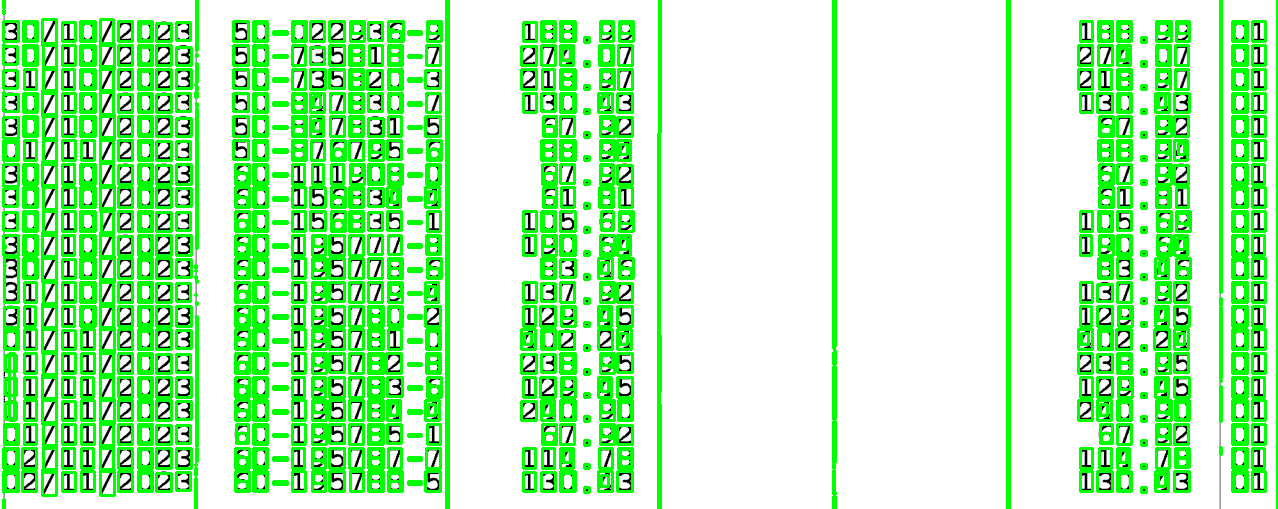

In [44]:
import cv2
import numpy as np

# Load the image
image_path = 'image.png'
image = cv2.imread(image_path)

# Convert the image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use a binary threshold to convert the image to black & white.
# This will help in finding contours.
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the contours in the image.
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Approximate contours to polygons and then get bounding rectangles
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Get the bounding rectangle for each polygon
    x, y, w, h = cv2.boundingRect(approx)

    # Draw the rectangle on the image
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Convert the image to bytes and display it
is_success, buffer = cv2.imencode(".png", image)
io_buf = io.BytesIO(buffer)
display(IPImage(data=io_buf.getvalue(), format='png'))

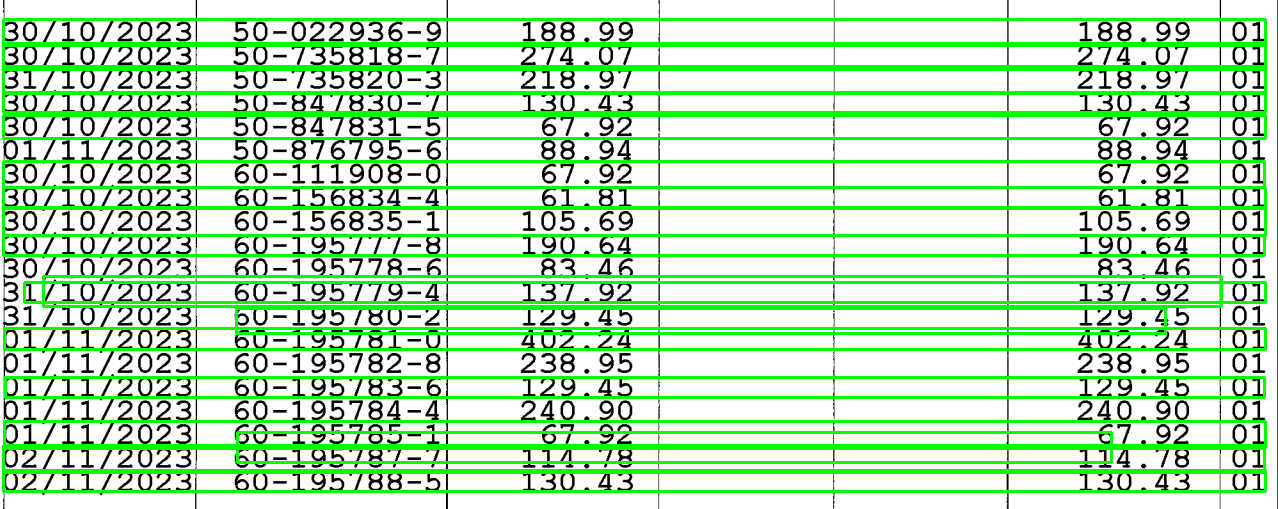

In [36]:
import cv2
import numpy as np
import io
from IPython.display import display, Image as IPImage

# Load the image
image_path = 'image.png'
image = cv2.imread(image_path)

# Convert the image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use a binary threshold to convert the image to black & white.
# This will help in finding contours.
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the contours in the image.
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Group contours that are within the same Y level (+- 5 pixels)
lines = {}
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Get the bounding rectangle for each polygon
    x, y, w, h = cv2.boundingRect(approx)

    # Check if this contour is close to other contours in Y level
    line_found = False
    for key in list(lines.keys()):
        if abs(key - y) <= 5:
            lines[key].append((x, y, w, h))
            line_found = True
            break

    # If this contour doesn't match an existing line, create a new line entry
    if not line_found:
        lines[y] = [(x, y, w, h)]

# Draw rectangles around lines
for y in lines:
    # Get the minimum and maximum X for the line
    min_x = min([coords[0] for coords in lines[y]])
    max_x = max([coords[0] + coords[2] for coords in lines[y]])
    # Get the minimum and maximum Y for the line
    min_y = min([coords[1] for coords in lines[y]])
    max_y = max([coords[1] + coords[3] for coords in lines[y]])

    if max_y - min_y < 20:
        continue

    if max_y - min_y > 30:
        continue

    # Draw the rectangle on the image
    cv2.rectangle(image, (min_x, min_y), (max_x, max_y), (0, 255, 0), 2)

# Convert the image to bytes and display it
is_success, buffer = cv2.imencode(".png", image)
io_buf = io.BytesIO(buffer)
display(IPImage(data=io_buf.getvalue(), format='png'))

1275
33.929577464788736


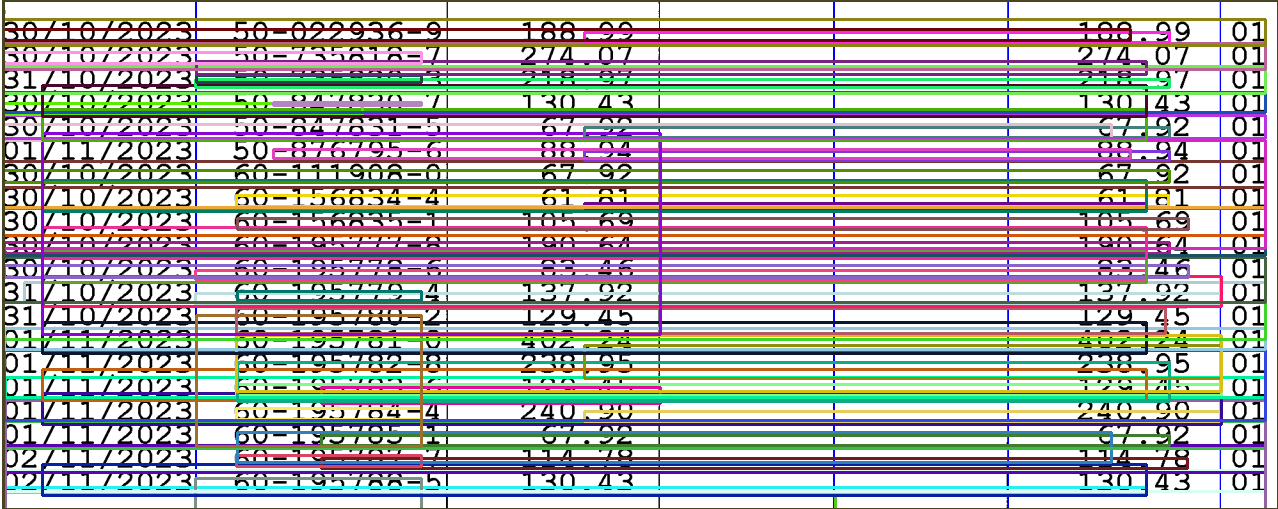

In [49]:
import cv2
import numpy as np
import random

# Load the image
image_path = 'image.png'
image = cv2.imread(image_path)

# Convert the image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use a binary threshold to convert the image to black & white.
# This will help in finding contours.
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find the contours in the image.
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Group contours that are within the same Y level (+- 5 pixels)
lines = {}
# Identify columns by finding contours with a large height-to-width ratio
columns = []
column_threshold = 10  # This is the threshold ratio to determine columns

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h / w > column_threshold and w < 10:  # Identifying column-like contours
        columns.append((x, y, w, h))

    # Approximate the contour to a polygon
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check if this contour is close to other contours in Y level
    line_found = False
    for key in list(lines.keys()):
        if abs(key - y) <= 5:
            lines[key].append((x, y, w, h))
            line_found = True
            break

    # If this contour doesn't match an existing line, create a new line entry
    if not line_found:
        lines[y] = [(x, y, w, h)]


# Interpolate columns
for col in columns:
    col_x, col_y, col_w, col_h = col
    # Extend the column lines from top to bottom of the image
    cv2.line(image, (col_x + col_w // 2, 0), (col_x + col_w // 2, image.shape[0]), (255, 0, 0), 1)

# Draw rectangles around lines
max_line_width = 0
average_line_height = 0
for y in lines:
    # Get the minimum and maximum X for the line
    min_x = min([coords[0] for coords in lines[y]])
    max_x = max([coords[0] + coords[2] for coords in lines[y]])
    # Get the minimum and maximum Y for the line
    min_y = min([coords[1] for coords in lines[y]])
    max_y = max([coords[1] + coords[3] for coords in lines[y]])

    # if max_y - min_y < 10:
    #     continue

    # if max_y - min_y > 30:
    #     continue

    # if (max_x - min_x) < 1240:
    #     continue

    # Draw the rectangle on the image
    random_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.rectangle(image, (min_x, min_y), (max_x, max_y), random_color, 2)
    if max_x - min_x > max_line_width:
        max_line_width = max_x - min_x
    average_line_height = average_line_height + (max_y - min_y)

print(max_line_width)
print(average_line_height / len(lines))
# Convert the image to bytes and display it
is_success, buffer = cv2.imencode(".png", image)
io_buf = io.BytesIO(buffer)
display(IPImage(data=io_buf.getvalue(), format='png'))


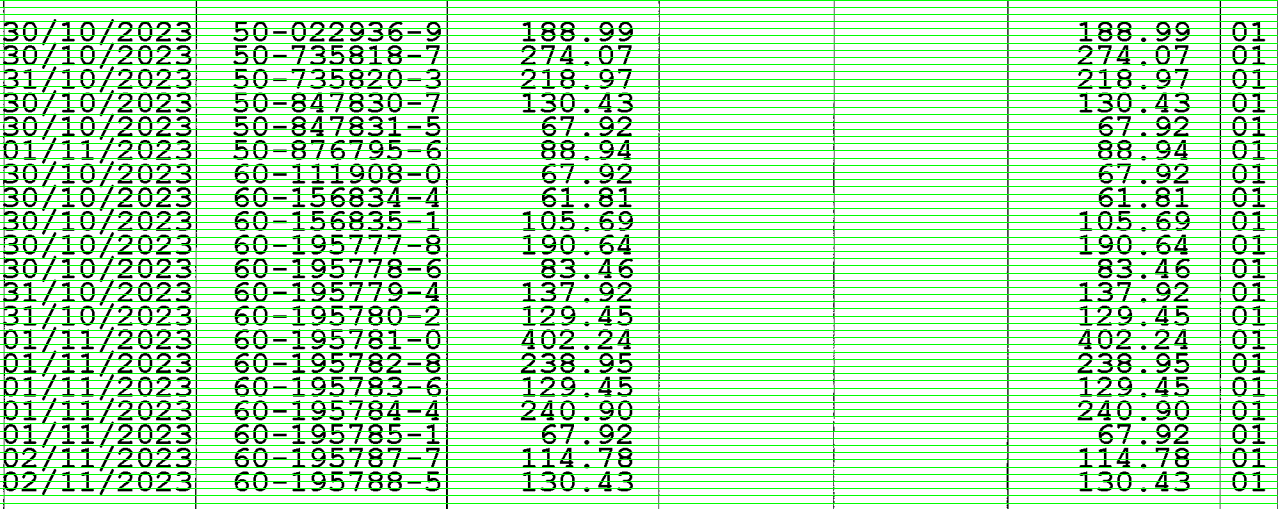

In [50]:
import cv2
import numpy as np
import random
import io
from IPython.display import Image as IPImage

def calculate_average_spacing(elements):
    if len(elements) < 2:
        return 0
    spacing = [elements[i+1] - elements[i] for i in range(len(elements)-1)]
    return sum(spacing) / len(spacing)

def adjust_positions(elements, average_spacing):
    return [int(average_spacing * i) for i in range(len(elements))]

def normalize_grid(lines, columns, image_shape):
    avg_line_spacing = calculate_average_spacing(sorted(lines))
    avg_column_spacing = calculate_average_spacing(sorted(columns))
    normalized_lines = adjust_positions(lines, avg_line_spacing)
    normalized_columns = adjust_positions(columns, avg_column_spacing)
    return normalized_lines, normalized_columns

# Load the image
image_path = 'image.png'
image = cv2.imread(image_path)

# Convert the image to gray scale and find contours
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Group contours
lines = {}
columns = []
column_threshold = 10
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h / w > column_threshold and w < 10:
        columns.append(x + w // 2)

    line_found = False
    for key in list(lines.keys()):
        if abs(key - y) <= 5:
            lines[key].append((x, y, w, h))  # Append the full tuple here
            line_found = True
            break
    if not line_found:
        lines[y] = [(x, y, w, h)]  # Store the full tuple here

for line in list(lines.keys()):  # Iterate over a copy of the keys to avoid runtime error
    # Get the minimum and maximum X for the line
    min_x = min([coords[0] for coords in lines[line]])
    max_x = max([coords[0] + coords[2] for coords in lines[line]])
    # Get the minimum and maximum Y for the line
    min_y = min([coords[1] for coords in lines[line]])
    max_y = max([coords[1] + coords[3] for coords in lines[line]])

    # if max_y - min_y < 10 or max_y - min_y > 90 or (max_x - min_x) < 1200:
    #     del lines[line]  # Use del to remove the key from the dictionary

# Normalize grid
detected_lines = list(lines.keys())
detected_columns = columns
normalized_lines, normalized_columns = normalize_grid(detected_lines, detected_columns, image.shape)

# Drawing the normalized grid on the image
# for line_y in lines:
for line_y in normalized_lines:
    cv2.line(image, (0, line_y), (image.shape[1], line_y), (0, 255, 0), 1)
    
    
    

# for col_x in normalized_columns:
#     cv2.line(image, (col_x, 0), (col_x, image.shape[0]), (0, 0, 255), 1)



# Additional processing from the second code block...
# [Add the rectangle drawing and other processes here]

# Convert the image to bytes and display it
is_success, buffer = cv2.imencode(".png", image)
io_buf = io.BytesIO(buffer)
display(IPImage(data=io_buf.getvalue(), format='png'))
